# Wrangle and Analyse Data: @WeRateDogs Twitter



### Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing Data](#store)
- [Wrangling Efforts Report](https://github.com/)
- [Communicate Findings Report](https://github.com/)
- [Sources](#sources)

<a id='intro'></a>
### Introduction

The dataset used for this wrangling project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The steps involved in this project are outlined below:
- Data wrangling, which consists of:
 Gathering data, Assessing data and Cleaning data
 
- Storing, analyzing, and visualizing your wrangled data

- Reporting on (1) your data wrangling efforts and (2) your data analyses and visualizations

<a id='gather'></a>
## Gathering data

Data will be gathered from the three (3) resources below: 
1. **Twitter archive file:** twitter_archive_enhanced.csv which was provided to me

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**1. Twitter archive file**

In [3]:
#Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os
import seaborn as sns

In [7]:
# Read the twitter_archive_enhanced.csv file as pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

**2. Tweet image prediction**

In [6]:
# Download the image prediction file using the link provided above
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [8]:
# Showing the data in the image predictions file

images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

**3. Twitter API & JSON**

**After answering so many questions and waiting for approval from Twitter, I am yet to receive authoraization. Therefore, I used the tweet_json.txt file provided by Udacity**

I displayed the code below to show what would have been used
```
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
```

```
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
```

```
tweet_ids = archive.tweet_id.values
len(tweet_ids)
```

```
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
```

In [37]:
#Storing the selected keys and values from JSON to a Dataframe
df_list =[]

with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        df_list.append({'tweet_id': json_data['id'],
                        'favorites': json_data['favorite_count'],
                        'retweets': json_data['retweet_count'],
                        'timestamp': json_data['created_at']})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id','favorites','retweets','timestamp'])

In [36]:
tweet_data

tweet_id  favorites  retweets                       timestamp
0     892420643555336193      39467      8853  Tue Aug 01 16:23:56 +0000 2017
1     892177421306343426      33819      6514  Tue Aug 01 00:17:27 +0000 2017
2     891815181378084864      25461      4328  Mon Jul 31 00:18:03 +0000 2017
3     891689557279858688      42908      8964  Sun Jul 30 15:58:51 +0000 2017
4     891327558926688256      41048      9774  Sat Jul 29 16:00:24 +0000 2017
...                  ...        ...       ...                             ...
2349  666049248165822465        111        41  Mon Nov 16 00:24:50 +0000 2015
2350  666044226329800704        311       147  Mon Nov 16 00:04:52 +0000 2015
2351  666033412701032449        128        47  Sun Nov 15 23:21:54 +0000 2015
2352  666029285002620928        132        48  Sun Nov 15 23:05:30 +0000 2015
2353  666020888022790149       2535       532  Sun Nov 15 22:32:08 +0000 2015

[2354 rows x 4 columns]

<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data will be displayed in the Jupyter Notebook for visual assessment.

In [38]:
archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [39]:
images

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [40]:
tweet_data

tweet_id  favorites  retweets                       timestamp
0     892420643555336193      39467      8853  Tue Aug 01 16:23:56 +0000 2017
1     892177421306343426      33819      6514  Tue Aug 01 00:17:27 +0000 2017
2     891815181378084864      25461      4328  Mon Jul 31 00:18:03 +0000 2017
3     891689557279858688      42908      8964  Sun Jul 30 15:58:51 +0000 2017
4     891327558926688256      41048      9774  Sat Jul 29 16:00:24 +0000 2017
...                  ...        ...       ...                             ...
2349  666049248165822465        111        41  Mon Nov 16 00:24:50 +0000 2015
2350  666044226329800704        311       147  Mon Nov 16 00:04:52 +0000 2015
2351  666033412701032449        128        47  Sun Nov 15 23:21:54 +0000 2015
2352  666029285002620928        132        48  Sun Nov 15 23:05:30 +0000 2015
2353  666020888022790149       2535       532  Sun Nov 15 22:32:08 +0000 2015

[2354 rows x 4 columns]

### Programmatic assessment

Pandas'functions and/or methods are used to assess the data.

#### Archive Dataframe Assessment

In [41]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [42]:
archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [43]:
archive[archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [44]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Tripp        1
Billy        1
Moofasa      1
Chase        1
Zooey        1
Name: name, Length: 957, dtype: int64

In [45]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [46]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [47]:
archive[archive['retweeted_status_id'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [48]:
archive[archive['name'].apply(len) <= 2 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
393   825876512159186944                    NaN                  NaN   
446   819015337530290176                    NaN                  NaN   
449   819004803107983360                    NaN                  NaN   
553   804026241225523202                    NaN                  NaN   
...                  ...                    ...                  ...   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   

                      timestamp  \
56    2017-07-02 15:32:16 +0000   
393   2017-01-30 01:21:19 +0000   
446   2017-01-11 02:57:27 +0000   
449   2017-01-11 02:15:36 +0000   
553   2016-11-30 18:16:08 +0000   
...                         ...   
2349  2015-11-16 00:35:11 +0000   
2350  2015-11-16 00:30:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   

                                                 source  \
56    <a href="http://twitter.com/download/iphone" r...   
393   <a href="http://twitter.com/download/iphone" r...   
446   <a href="http://twitter.com/download/iphone" r...   
449   <a href="http://twitter.com/download/iphone" r...   
553   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
56    Here is a pupper approaching maximum borkdrive...                  NaN   
393   This is Mo. No one will push him around in the...                  NaN   
446   RT @dog_rates: This is Bo. He was a very good ...         8.190048e+17   
449   This is Bo. He was a very good First Doggo. 14...                  NaN   
553   This is Bo. He's going to make me cry. 13/10 p...                  NaN   
...                                                 ...                  ...   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   
2350  This is a truly beautiful English Wilson Staff...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
56                         NaN                        NaN   
393                        NaN                        NaN   
446               4.196984e+09  2017-01-11 02:15:36 +0000   
449                        NaN                        NaN   
553                        NaN                        NaN   
...                        ...                        ...   
2349                       NaN                        NaN   
2350                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
56    https://twitter.com/dog_rates/status/881536004...                14   
393   https://twitter.com/dog_rates/status/825876512...                11   
446   https://twitter.com/dog_rates/status/819004803...                14   
449   https://twitt

In [49]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Images Dataframe Assessement

In [51]:
images.sample(10)

tweet_id                                          jpg_url  \
948   704819833553219584  https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg   
439   674436901579923456  https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg   
39    666649482315059201  https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
154   668779399630725120  https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg   
1787  829501995190984704  https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg   
41    666701168228331520  https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
954   705223444686888960  https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg   
726   686358356425093120  https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg   
2018  880221127280381952  https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg   
1235  746507379341139972  https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg   

      img_num                        p1   p1_conf  p1_dog  \
948         1                guinea_pig  0.994776   False   
439         1              acorn_squash  0.375392   False   
39          1             Border_collie  0.447803    True   
154         1  Chesapeake_Bay_retriever  0.285508    True   
1787        1            French_bulldog  0.950851    True   
41          1        Labrador_retriever  0.887707    True   
954         1              Egyptian_cat  0.090508   False   
726         1                       pug  0.985237    True   
2018        1                 Chihuahua  0.238525    True   
1235        1                toy_poodle  0.508292    True   

                            p2   p2_conf  p2_dog                   p3  \
948                    hamster  0.004069   False          wood_rabbit   
439                   Shih-Tzu  0.105416    True                Lhasa   
39            English_springer  0.170497    True               collie   
154                 Weimaraner  0.146832    True  black-footed_ferret   
1787                  Pekinese  0.015200    True                  pug   
41                   Chihuahua  0.029307    True       French_bulldog   
954   Chesapeake_Bay_retriever  0.077373    True     Mexican_hairless   
726               bull_mastiff  0.008841    True                boxer   
2018                   meerkat  0.104256   False              clumber   
1235          Lakeland_terrier  0.234458    True        affenpinscher   

       p3_conf  p3_dog  
948   0.000206   False  
439   0.072832    True  
39    0.139206    True  
154   0.060865   False  
1787  0.011094    True  
41    0.020756    True  
954   0.049472    True  
726   0.002321    True  
2018  0.052580    True  
1235  0.084563    True

In [52]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
sum(images.jpg_url.duplicated())

66

In [55]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                2
                                                              ..
https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg                1
https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg                1
https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg                1
https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg                1
https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg                1
Name: jpg_url, Length: 2009, dtype: int64

In [56]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [57]:
print(images.p1_dog.value_counts())
print(images.p2_dog.value_counts())
print(images.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [58]:
images.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [59]:
images[images.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

#### Tweet Data Dataframe Assessement

In [60]:
tweet_data.head()

tweet_id  favorites  retweets                       timestamp
0  892420643555336193      39467      8853  Tue Aug 01 16:23:56 +0000 2017
1  892177421306343426      33819      6514  Tue Aug 01 00:17:27 +0000 2017
2  891815181378084864      25461      4328  Mon Jul 31 00:18:03 +0000 2017
3  891689557279858688      42908      8964  Sun Jul 30 15:58:51 +0000 2017
4  891327558926688256      41048      9774  Sat Jul 29 16:00:24 +0000 2017

In [61]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [62]:
tweet_data.describe()

tweet_id      favorites      retweets
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

In [63]:
tweet_data[tweet_data.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, favorites, retweets, timestamp]
Index: []

In [64]:
tweet_data.favorites.mean()

8080.968564146135

In [65]:
tweet_data.retweets.mean()

3164.7973661852166

### Quality

Here, we will follow the Quality Data Dimensions which include Completeness, Validity, Accuracy and Consistency.

#### archive Dataset

1. Remove tweets that have been retweeted since we only need original.
2. Change `tweet_id` data type from integer to string.
3. Remove columns that are not needed for our analysis.
4. Change `timestamp` from string to date time and make separate columns for date and time.
5. Names: some dogs have 'None' as a name, or 'a', or 'an.'

#### images Dataset

6. Columns p1,p2 and p3 have both capital and small letters.
7. Drop duplicated jpg_url.
8. Columns p1,p2 and p3 have underscore instead of space.
9. Change `tweet_id` data type from integer to string.

#### tweet_data Dataset

10. Change `tweet_id` from integer to string.

### Tidiness
In tidy data:

- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

#### issues

1. The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo).
2. perform inner join between the three data frame as they all have data for same tweet.

<a id='clean'></a>
## Cleaning Data
Here, I will fix the quality and tidiness issues that were identified in the assessment step above. I will use the Programmatic Data cleaning process which are:
- Define
- Code
- Test

In [66]:
# Make a copy before cleaning
archive_clean = archive.copy()
images_clean = images.copy()
tweet_data_clean = tweet_data.copy()

### Quality

__Define__

Remove tweets that have been retweeted since we only need original.

__Code__

In [68]:
# Let's check for retweets looking at the retweeted_status column.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

As seen above, there are 181 retweets. I will go ahead and remove them along with other columns related to the retweet.

In [69]:
# removing retweet from the dataframe
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()== True].index, inplace= True)

In [71]:
#Dropping  columns with retweet infomation
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

__Test__

In [72]:
list(archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

__Define__

Change `tweet_id` from interger to string using the `astype` function

__Code__

In [73]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

__Test__

In [74]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


__Define__

Remove columns that are not needed for our analysis using the `drop` function.

In [75]:
# removing in_reply_to_status_id and in_reply_to_user_id since I don't need them
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

__Test__

In [76]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

__Define__

Change `timestamp` from string to date time and make separate columns for date and time, using `to_datetime` to convert the column from strings to DateTime objects

__Code__

In [77]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['date'] = archive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
archive_clean['time'] = archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [107]:
#using pandas to_datetime function for converting from string to date time format

archive_clean['date'] = pd.to_datetime(archive_clean['date'])
archive_clean['time'] = pd.to_datetime(archive_clean['time'])

__Test__

In [108]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
dog_stages            2175 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), int64(2), object(6)
memory usage: 203.9+ KB


__Define__

Names: some dogs have 'None' as a name, or 'a', or 'an.'

__Code__

In [81]:
archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'None')

__Test__

In [82]:
archive_clean['name'].value_counts()

None       784
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Anakin       1
Taz          1
Mya          1
Rizzy        1
Ridley       1
Name: name, Length: 931, dtype: int64

__Define__

Columns p1,p2 and p3 have both capital and small letters.

__Code__

In [91]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

__Test__

In [93]:
images_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

__Define__

Drop duplicated jpg_url

__Code__

In [94]:
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

__Test__

In [96]:
sum(images_clean['jpg_url'].duplicated())

0

__Define__

Columns  p1,p2 and p3 have underscore instead of space.

__Code__

In [97]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

__Test__

In [98]:
images_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh springer spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature pinscher   
2        1         german shepherd  0.596461    True            malinois   
3        1     rhodesian ridgeback  0.408143    True             redbone   
4        1      miniature pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland sheepdog  0.061428    True  
1  0.074192    True  rhodesian ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

__Define__

Change `tweet_id` from int to string in the `images`  dataset

__Code__

In [99]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)

__Test__

In [100]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


__Define__

Change `tweet_id` data type from int to string in the `tweet_data`  dataset

__Code__

In [101]:
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

__Test__

In [102]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


### Tidiness

__Define__

The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo). I will create a new column called Dog Stage and combine them to the colmumn

__Code__

In [104]:
archive_clean['dog_stages'] = archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
archive_clean['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) # if all none then filled with none
archive_clean['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)# if doggo then filled with doggo
archive_clean['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)# if floofer then filled with floofer
archive_clean['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)# if pupper then filled pupper
archive_clean['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)# if puppo then filled puppo

In [105]:
#remove doggo, floofer, pupper and puppo columns from the dataset
archive_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

__Test__

In [106]:
archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name        date   time dog_stages  
0                  10   Phineas  08-01-2017  16:23      None   
1                  10     Tilly  08-01-2017  00:17      None   
2                  10    Archie  07-31-2017  00:18      None   
3                  10     Darla  07-30-2017  15:58      None   
4                  10  Franklin  07-29-2017  16:00      None

__Define__

Perform inner join between the three data frame as they all have data for same tweet. I will Merge archive_clean, images_clean and tweet_data_clean dataframes

__Code__

In [109]:
df_master = pd.merge(archive_clean, images_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tweet_data_clean, on = 'tweet_id', how = 'inner' )

__Test__

In [110]:
# checking result from above code 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 25 columns):
tweet_id              1928 non-null object
timestamp_x           1928 non-null datetime64[ns, UTC]
source                1928 non-null object
text                  1928 non-null object
expanded_urls         1928 non-null object
rating_numerator      1928 non-null int64
rating_denominator    1928 non-null int64
name                  1928 non-null object
date                  1928 non-null datetime64[ns]
time                  1928 non-null datetime64[ns]
dog_stages            1928 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null int64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null bool
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null bool
p3                    1928 non-null object
p3_conf  

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [111]:
#Store the clean DataFrame in a CSV file
df_master.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

In [120]:
df_master.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       1928.000000         1928.000000  1928.000000  1928.000000   
mean          12.293568           10.550311     1.201763     0.593835   
std           42.201839            7.444349     0.558240     0.273084   
min            0.000000            2.000000     1.000000     0.044333   
25%           10.000000           10.000000     1.000000     0.360137   
50%           11.000000           10.000000     1.000000     0.587635   
75%           12.000000           10.000000     1.000000     0.848562   
max         1776.000000          170.000000     4.000000     1.000000   

            p2_conf       p3_conf      favorites      retweets  
count  1.928000e+03  1.928000e+03    1928.000000   1928.000000  
mean   1.338761e-01  6.008588e-02    8296.298237   2514.632261  
std    1.006528e-01  5.083543e-02   11371.277140   4187.214895  
min    1.011300e-08  1.740170e-10      81.000000     16.000000  
25%    5.378615e-02  1.605498e-02    1873.750000    611.750000  
50%    1.163795e-01  4.952715e-02    3904.000000   1299.000000  
75%    1.943738e-01  9.130702e-02   10280.000000   2911.250000  
max    4.880140e-01  2.734190e-01  132810.000000  79515.000000

In [141]:
#To view the most common dog stages
df_master['dog_stages'].value_counts()

None                    1633
pupper                   199
doggo                     59
puppo                     21
floofer                    7
doggoNonepupperNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stages, dtype: int64

In [145]:
#To view the most common dog name
df_master.name.value_counts()

None         625
Charlie       11
Cooper        10
Lucy          10
Oliver        10
            ... 
Florence       1
Champ          1
Mutt           1
Anna           1
Alexander      1
Name: name, Length: 890, dtype: int64

In [146]:
df_master.p1.value_counts()
df_master.p2.value_counts()
df_master.p3.value_counts()

labrador retriever    73
chihuahua             56
golden retriever      44
eskimo dog            34
kelpie                31
                      ..
toyshop                1
chain                  1
gorilla                1
triceratops            1
barbell                1
Name: p3, Length: 401, dtype: int64

What is the Common Dog in this dataset?

C:\Users\SADEEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


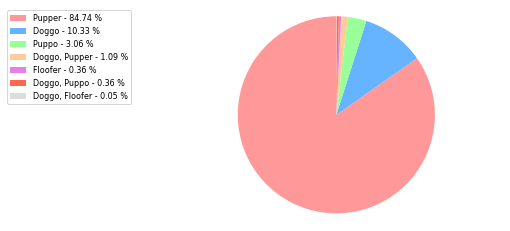

In [119]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df_master[df_master['dog_stages'] != 'None']['dog_stages'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 


plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.), fontsize=8);
plt.axis('equal');

plt.savefig('Most_common_dog.png', bbox_inches='tight');

- From the above chart, we can see that `Pupper` having 84.74% is the Common Dog, while `Floofer` having only 0.36% is the least common dog.

What is the **Most** common rating?

In [134]:
df_integer_ratings_14 = df_master[(df_master.rating_numerator <= 14)]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

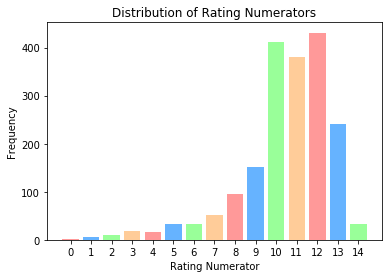

In [135]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

- Most ratings are integers that are 14 and below. Also, ratings above 20 are usually given to images that contain more than one dog. So, 14 is the maximum rating considered in this plot. From the bar chart above, it is shown that Most images are given a rating between 10 to 13.

Relationship between Favorite Count and Retweet count

<Figure size 720x720 with 0 Axes>

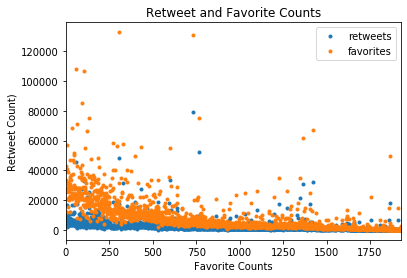

In [147]:
# plotting different realtionship between Favorite counts and Retweet
plt.figure(figsize = (10, 10))
df_master[['retweets', 'favorites']].plot(style = '.')
plt.title('Retweet and Favorite Counts');
plt.xlabel('Favorite Counts');
plt.ylabel('Retweet Count)');

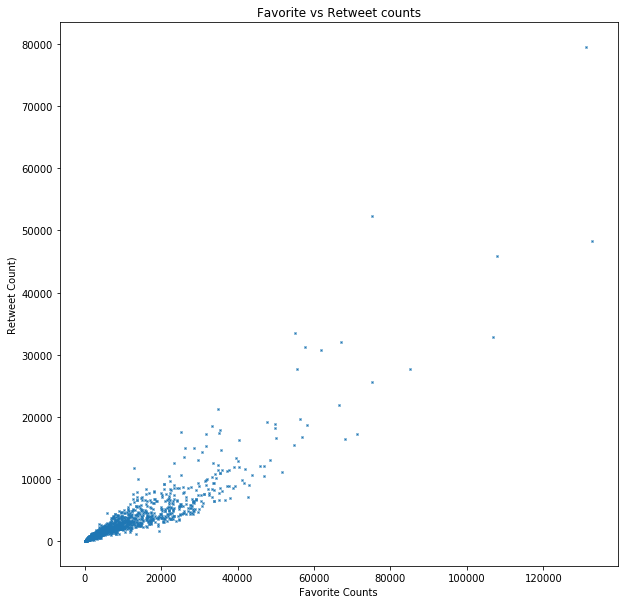

In [138]:
plt.figure(figsize = (10, 10))
plt.plot(df_master.favorites, df_master.retweets, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

- As we can see above, Retweets are positively correlated with Favorite counts. We can say that the more the retweet counts, the more the favorite counts

## Sources

- https://knowledge.udacity.com/
- https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
- https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top